Logistic Regression



Step 1: Import Libraries 


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Load Titanic Dataset from seaborn


In [31]:
titanic = sns.load_dataset("titanic")

Step 3: Select Features and clean data

In [40]:
data = titanic[['survived','pclass','sex','age','fare']]
data = data.dropna()
print(data.head())
data['sex'] = data['sex'].map({'male':0,'female':1})
print("\n",data.head())

   survived  pclass     sex   age     fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

    survived  pclass  sex   age     fare
0         0       3    0  22.0   7.2500
1         1       1    1  38.0  71.2833
2         1       3    1  26.0   7.9250
3         1       1    1  35.0  53.1000
4         0       3    0  35.0   8.0500


Step 4: Split the data

In [33]:
X = data[['pclass','sex','age','fare']]
y = data['survived']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

Step 5: Train Logistic regression

In [34]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


Step 6: Predict

In [35]:
y_pred = model.predict(X_test)

Step 7: Evaluate

In [36]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy 0.7552447552447552

Confusion Matrix:
 [[68 19]
 [16 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



Step 8: Visualize results

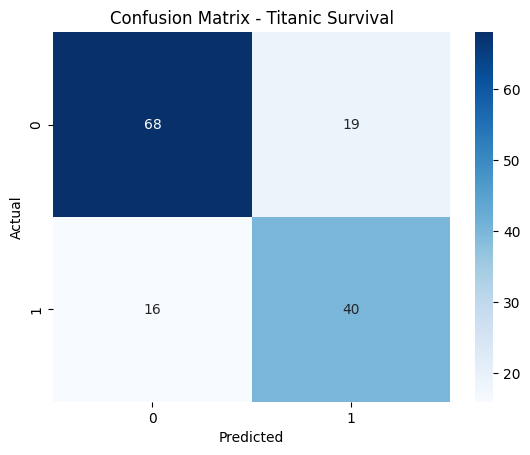

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Survival")
plt.show()